 #                                                **Exploring Breathcode data**

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Loading the data

In [2]:
data = pd.read_csv('../data/raw/All_Form_Entries.csv', dtype={'utm_content': 'object', 'current_download': 'object', 'state': 'object', 'lead_type': 'object', 'lead_generation_app':'object'})

C:\Users\danie\AppData\Local\Temp\ipykernel_20104\2882604904.py:1: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/raw/All_Form_Entries.csv', dtype={'utm_content': 'object', 'current_download': 'object', 'state': 'object', 'lead_type': 'object', 'lead_generation_app':'object'})


In [3]:
data.head()

,id,first_name,last_name,email,phone,course,client_comments,language,utm_url,utm_medium,...,deal_status,sentiment,ac_contact_id,ac_deal_id,user_id,won_at,ac_expected_cohort,current_download,lead_generation_app_id,utm_content
0,1423,Dylan,Stallone,stallonedylan954@gmail.com,9.544660e+09,NaN,NaN,us,https://4geeksacademy.co/,NaN,...,LOST,NaN,20748.0,17526.0,NaN,NaN,NaN,NaN,NaN,NaN
1,8209,Ivan Trujillo,NaN,Trujillibarrales@gmail.com,5.698290e+09,full-stack,NaN,us,https://4geeksacademy.com/es/landing/curso-de-...,cpc,...,NaN,NaN,27257.0,22887.0,NaN,NaN,NaN,NaN,NaN,NaN
2,31352,Santiago Martinez,NaN,martinez.snmc@gmail.com,5.980947e+11,full-stack,NaN,es,https://4geeksacademy.com/es/coding-bootcamps/...,NaN,...,NaN,NaN,44553.0,50098.0,4981.0,NaN,NaN,NaN,NaN,NaN
3,135,Alejandro,Sanchez,a.a.lejo@gmail.com,NaN,full-stack,NaN,us,https://4geeksacademy.co/us/course/full-stack-...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,149,Adrian,Amesty,adrian_amesty@hotmail.com,NaN,full-stack,NaN,es,https://4geeksacademy.co/es/course/desarrollo-...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.shape

(46372, 46)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45077 entries, 0 to 45076
Data columns (total 46 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      45077 non-null  int64  
 1   first_name              44192 non-null  object 
 2   last_name               4339 non-null   object 
 3   email                   45077 non-null  object 
 4   phone                   43419 non-null  float64
 5   course                  42615 non-null  object 
 6   client_comments         1972 non-null   object 
 7   language                45077 non-null  object 
 8   utm_url                 45016 non-null  object 
 9   utm_medium              18624 non-null  object 
 10  utm_campaign            16879 non-null  object 
 11  street_address          30426 non-null  object 
 12  country                 37591 non-null  object 
 13  city                    37605 non-null  object 
 14  latitude                32953 non-null

## Exploratory Data Analysis

Identifying a very important and our target variable.

Before starting the cleaning of data, we need to identify our target variable to make sure we have it in the correct format.

As we want to know the impact on number of leads that converted to clients we need to use the column 'deal_status' to know which of our leads have the status 'WON'.

In [10]:
data['deal_status'].value_counts()

LOST    10611
WON       894
Name: deal_status, dtype: int64

**Confirming reliability: Identifying if deal_status has been filled in recent months**

In [11]:
#create new dataframe
reliability_data = data[['year-month','deal_status']]

In [12]:
#create a column where filled cells appear as 1 and null cells as 0 

reliability_data['deal_status'] = np.where(data['deal_status'].isnull(), 'not_filled', 'filled')

C:\Users\danie\AppData\Local\Temp\ipykernel_20104\1357308119.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reliability_data['deal_status'] = np.where(data['deal_status'].isnull(), 'not_filled', 'filled')


In [13]:
reliability_data.head()

,year-month,deal_status
0,2020-11,filled
1,2021-06,not_filled
2,2022-04,not_filled
3,2020-09,not_filled
4,2020-09,not_filled


In [14]:
reliability_data.set_index('year-month', inplace=True)

In [15]:
agg = reliability_data.groupby(level=0).deal_status.value_counts().unstack('deal_status')
agg

deal_status,filled,not_filled
year-month,,
2020-09,2,137
2020-10,39,482
2020-11,33,522
2020-12,47,837
2021-01,94,944
2021-02,198,850
2021-03,201,830
2021-04,143,800
2021-05,183,618


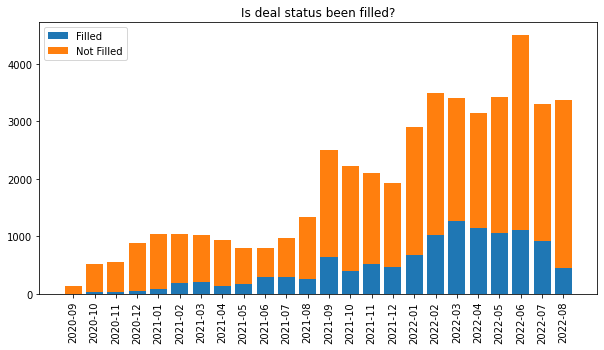

In [16]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))

# First plot the 'Filled' bars for every period.
ax.bar(agg.index, agg['filled'], label='Filled')
# Then plot the 'Not filled' bars on top, starting at the top of the 'Filled'
# bars.
ax.bar(agg.index, agg['not_filled'], bottom=agg['filled'],
       label='Not Filled')
ax.set_title('Is deal status been filled?')
plt.xticks (rotation= 90)
ax.legend()



Text(0.5, 1.0, 'Deal_status filled by period')

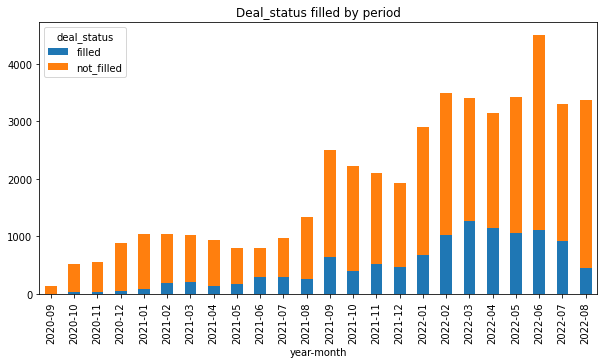

In [17]:
#second option to create the graph

reliability_data.groupby(level=0).deal_status.value_counts().unstack('deal_status').plot.bar(stacked=True, figsize=(10,5))

plt.title('Deal_status filled by period')


**What pattern can be found in the null deal_ids from Ac?.**

In [21]:
ab = data[['year-month','ac_deal_id']]

In [22]:
ab.set_index('year-month')

,ac_deal_id
year-month,
2020-11,17526.0
2021-06,22887.0
2022-04,50098.0
2020-09,NaN
2020-09,NaN
...,...
2022-02,42445.0
2022-08,62740.0
2022-08,63906.0


In [23]:
# counting null per period for visualization
null_deal_id = ab['ac_deal_id'].isna().groupby(ab['year-month']).sum().reset_index()

In [24]:
null_deal_id = null_deal_id.set_index('year-month')

<AxesSubplot:title={'center':'Null deal_id values per month'}, xlabel='year-month'>

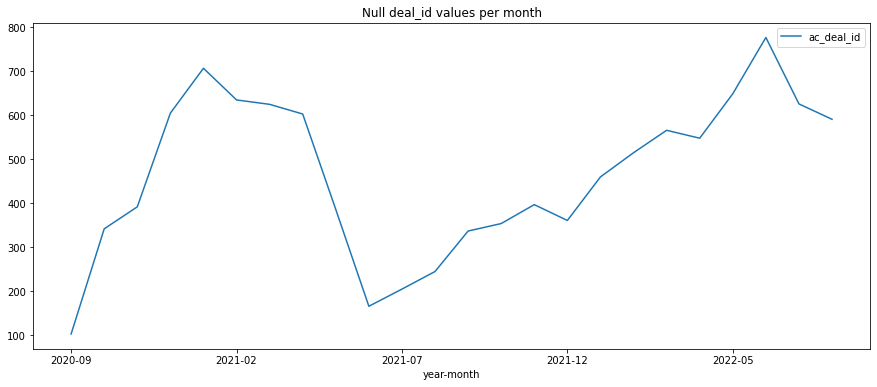

In [25]:
null_deal_id.plot(title="Null deal_id values per month", figsize=(15,6))

In [26]:
null_deal_id.index = pd.to_datetime(null_deal_id.index)

I shouldn't drop rows with null ac_deal_id because they are clearly not only from the first months of data. Null ac_deal_id are still showing up in 2022 having the largest number of nulls in June 2022.

**Visualizing target variable**

In [18]:
#we already have a classification variable but only some are labeled as WON and LOST.
#We will consider all null values and LOST values as 0, and WON values as 1.

data['subscribed'] = np.where(data['deal_status'] == 'WON', '1', '0')

In [19]:
#This is to replace the notnulls with 1, instead of creating a new column.

#data.loc[data['won_at'].notnull(), 'won_at'] = 1
#data.loc[data['won_at'].isnull(), 'won_at'] = 0

In [20]:
data['subscribed'].value_counts()

0    45478
1      894
Name: subscribed, dtype: int64

In [21]:
target = data.subscribed
features = data.drop('subscribed', axis=1)

**Visualizing features**

In [22]:
#Let's create 2 functions to check the categories in categorical features

def countplot_features(df, feature):
    fig = plt.figure(figsize=(10,6))
    ax = sns.countplot(x=df[feature], order=df[feature].value_counts(ascending=False).index);

    abs_values = df[feature].value_counts(ascending=False).values
    ax.bar_label(container=ax.containers[0], labels=abs_values)
    plt.xticks(rotation=30, ha='right')
    #plt.show()

In [23]:
def countplot_targetvsfeature(df,feature,target):
    fig = plt.figure(figsize=(10,6))
    ax = sns.countplot(x=df[feature], hue=target, order=df[feature].value_counts(ascending=False).index);

    abs_values = df[feature].value_counts(ascending=False).values
    ax.bar_label(container=ax.containers[0], labels=abs_values)
    plt.xticks(rotation=30, ha='right')
    #plt.show()

1. Visualizaing courses

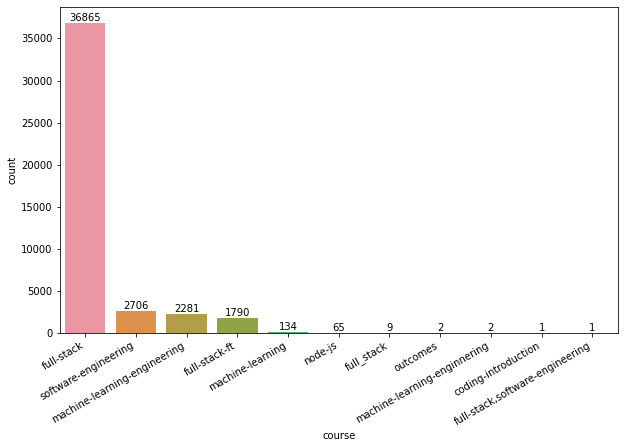

In [24]:
countplot_features(data,'course')

2. Visualizing location

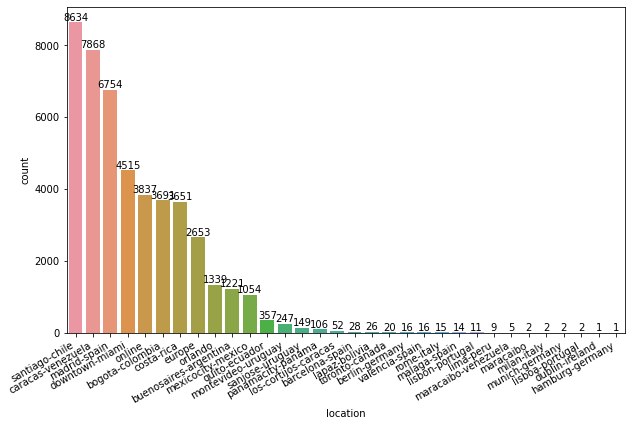

In [25]:
countplot_features(data,'location')

3. Visualizing language

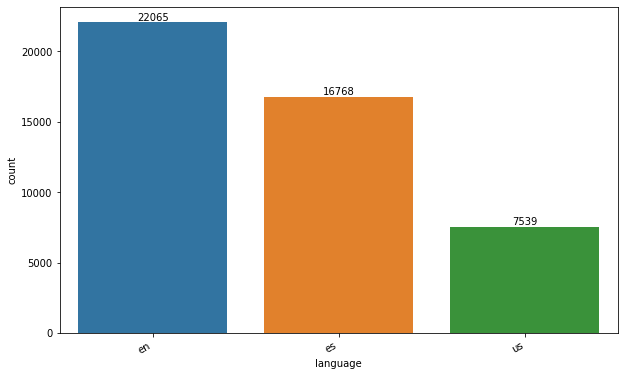

In [26]:
countplot_features(data,'language')

4. Visualizing utm_medium

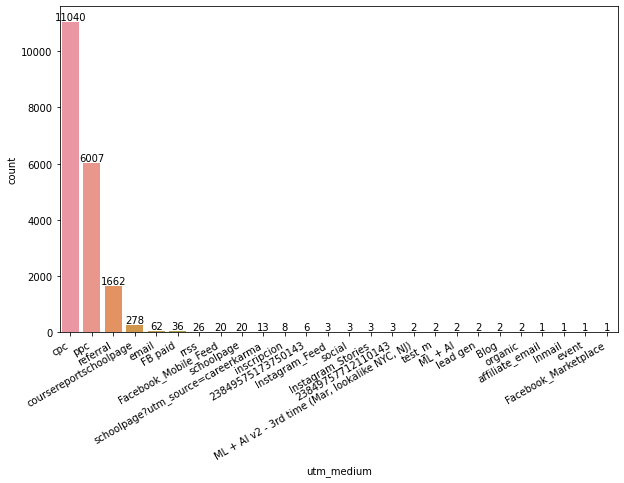

In [27]:
countplot_features(data,'utm_medium')

--------> **a way to discover where do this strange labels belong to:** 

In [28]:
data[data['utm_medium'] =='email']['utm_source']

128                 NaN
133                 NaN
457                 NaN
460                 NaN
520                 NaN
              ...      
35605    ActiveCampaign
37361    ActiveCampaign
37664    ActiveCampaign
38223    ActiveCampaign
43794    ActiveCampaign
Name: utm_source, Length: 62, dtype: object

5. Visualizing utm_source

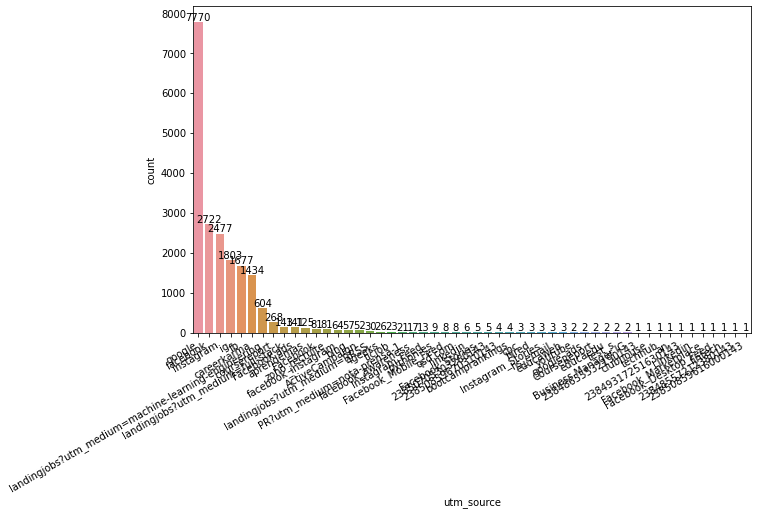

In [29]:
countplot_features(data,'utm_source')

In [30]:
data['utm_source'].value_counts()

google                                                 7770
facebook                                               2722
instagram                                              2477
ig                                                     1803
fb                                                     1677
careerkarma                                            1434
landingjobs?utm_medium=machine-learning-engineering     604
coursereport                                            268
landingjobs?utm_medium=full-stack                       143
Facebook ads                                            141
aprendemas                                              125
Facebook                                                 81
zoho_recruite                                            81
facebook_instagram                                       64
bing                                                     57
ActiveCampaign                                           52
landingjobs?utm_medium=RRSS             

**--------> a way to discover where do this strange labels belong to:**

In [31]:
data[data['utm_source'] =='CourseReport']['utm_medium']

5088    Blog
5103    Blog
Name: utm_medium, dtype: object

6. Counting utm_campaign

In [32]:
data['utm_campaign'].value_counts()

chili-leads-colombia                           1466
4Geeks - Prospecting - Clientes Potenciales    1374
chili-leads-form                               1220
Perfil_Target_Cursos_Programacion_4geeks       1011
23848776062070343                               756
                                               ... 
chili-brand-colombia{ignore}                      1
example_campaign                                  1
Sondersland 2022                                  1
410423832                                         1
13545917701                                       1
Name: utm_campaign, Length: 190, dtype: int64

7. Counting Tags

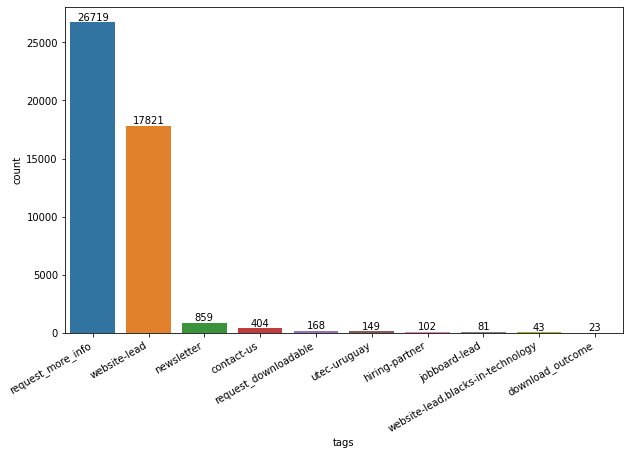

In [33]:
countplot_features(data,'tags')

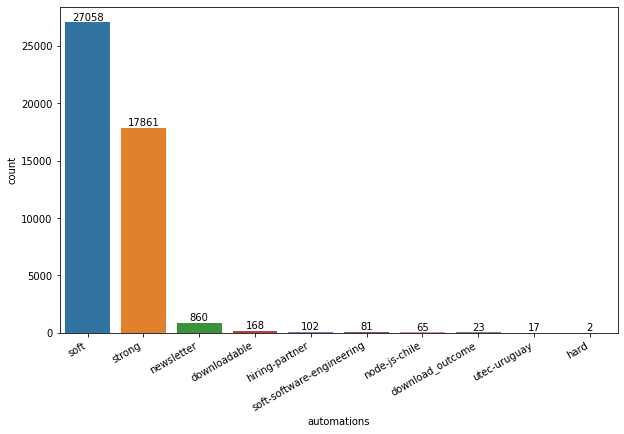

In [34]:
countplot_features(data,'automations')

**Data from only leads that converted to won**

In [62]:
won_df = leads_data[leads_data['subscribed'] == "1"]
won_df.head(10)

,id,first_name,email,course,language,utm_url,utm_medium,utm_campaign,country,created_at,...,academy_id,deal_status,ac_contact_id,ac_deal_id,user_id,won_at,lead_generation_app_id,subscribed,has_gclid,days_to_convert
23,7393,Jesus Bruque Guerrero,bruke3_voleyutrera@hotmail.com,full-stack,es,facebook_form_182669996627327,cpc,[SIDN] Clientes potenciales,NaN,2021-05-24,...,6.0,WON,26268.0,22208.0,4023.0,2021-12-01,NaN,1,1,191.0
55,143,Vanessa,lamarque.van@gmail.com,full-stack,en,https://4geeksacademy.co/us/apply,NaN,NaN,USA,2020-09-24,...,4.0,WON,18291.0,21352.0,NaN,2021-10-19,NaN,1,0,390.0
338,556,Jorge,uv.mhjl@gmail.com,NaN,en,https://4geeksacademy.co/,NaN,NaN,United States,2020-10-14,...,4.0,WON,18794.0,16264.0,NaN,2022-05-24,NaN,1,0,587.0
383,32482,Francisco Mandujano,franciscomandujanoe@gmail.com,full-stack,en,https://4geeksacademy.com/es/aplica,NaN,NaN,Chile,2022-04-28,...,5.0,WON,47734.0,51022.0,4887.0,2022-06-13,NaN,1,0,46.0
417,22029,stefany albarran,stefa161013@gmail.com,full-stack,en,https://4geeksacademy.com/es/coding-bootcamps/...,NaN,NaN,Spain,2022-01-26,...,6.0,WON,38622.0,34365.0,NaN,2022-05-24,NaN,1,0,118.0
422,689,Kenneth,kparra7491@gmail.com,full-stack,en,https://4geeksacademy.co/us/apply,NaN,NaN,Spain,2020-10-20,...,4.0,WON,19138.0,16584.0,NaN,2022-05-24,NaN,1,0,581.0
466,26650,Gladys Sánchez Quiroz,gsanchezquiroz@outlook.com,full-stack,en,https://4geeksacademy.com/es/coding-bootcamps/...,NaN,NaN,Venezuela,2022-03-05,...,2.0,WON,42855.0,45427.0,4880.0,2022-05-03,NaN,1,0,59.0
858,8323,Italo,italog.penaloza@gmail.com,full-stack,en,https://4geeksacademy.com/us/financials,NaN,NaN,Chile,2021-06-25,...,5.0,WON,27361.0,22983.0,NaN,2021-08-09,NaN,1,0,45.0
1086,1376,Felipe Tomás Arancibia Torres,arancibiat.felipe@gmail.com,full-stack,es,https://4geeksacademy.co/es/course/desarrollo-...,NaN,NaN,Remoto,2020-11-26,...,7.0,WON,47808.0,51099.0,NaN,2022-05-06,NaN,1,0,526.0
1189,1466,Alvaro Brante,acbrante@gmail.com,full-stack,es,https://4geeksacademy.co/es/course/desarrollo-...,NaN,NaN,Chile,2020-11-30,...,5.0,WON,20831.0,28834.0,NaN,2021-10-28,NaN,1,0,332.0


In [63]:
won_df.shape

(832, 27)

*Data ready for wons consultations*
- - - - - - - - - - - - - - - - - -

# Questions

### 1. Leads that came by: organic vs cpc vs referrals (from a thirdparty like course report, careerkarma, etc.)

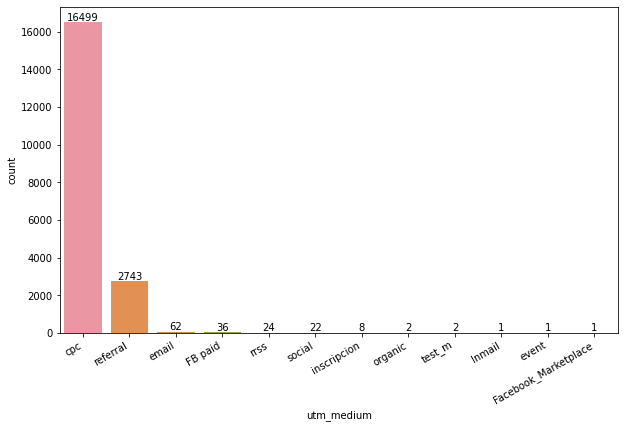

In [64]:
countplot_features(leads_data,'utm_medium')

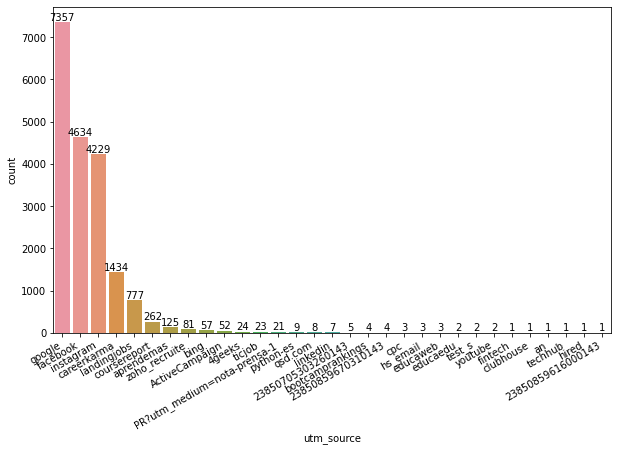

In [65]:
countplot_features(leads_data,'utm_source')

### 2. What are the true labels for utm_source: python-es, qsd.com, techhub, and PR.
###          utm_medium: inscripcion.

In [66]:
leads_data[(leads_data.utm_source == 'PR?utm_medium=nota-prensa-1')]['academy_id']

6698     10.0
10468    10.0
10562    10.0
10636    10.0
10637    10.0
10863    10.0
12211    10.0
14160    10.0
14655    10.0
14657    10.0
14659    10.0
16487    10.0
18055    10.0
18281     6.0
18544    10.0
21039    10.0
28085    10.0
32383    10.0
34200    10.0
34876    10.0
35814    10.0
Name: academy_id, dtype: float64

In [67]:
leads_data[(leads_data.utm_source == 'python-es')]['academy_id']

9993     10.0
11615    10.0
11898    10.0
11901    10.0
11902    10.0
11981    10.0
13151    10.0
35538    10.0
35566    10.0
Name: academy_id, dtype: float64

In [68]:
leads_data[(leads_data.utm_source == 'qsd.com')]['academy_id']

7717     7.0
14972    7.0
15323    7.0
18036    7.0
25805    7.0
29475    7.0
30363    7.0
43296    7.0
Name: academy_id, dtype: float64

### 3. Make sure that leads that came from coursereport have referral as utm_medium.

In [69]:
leads_data[leads_data['utm_source']=='coursereport']

,id,first_name,email,course,language,utm_url,utm_medium,utm_campaign,country,created_at,...,academy_id,deal_status,ac_contact_id,ac_deal_id,user_id,won_at,lead_generation_app_id,subscribed,has_gclid,days_to_convert
253,27285,David Torres,davidtorresc8@gmail.com,machine-learning-engineering,en,https://4geeksacademy.com/us/coding-bootcamps/...,referral,NaN,Mexico,2022-03-11,...,7.0,NaN,43371.0,46393.0,NaN,NaT,NaN,0,0,NaN
807,1092,Paul D'Ambrosio,pauld1635@gmail.com,full-stack,en,https://4geeksacademy.co/us/course/full-stack-...,referral,NaN,United States,2020-11-12,...,4.0,NaN,NaN,NaN,NaN,NaT,NaN,0,0,NaN
932,1198,Carlos Gonzalez,carlossgv@gmail.com,NaN,es,https://4geeksacademy.co/es/course/ingenieria-...,referral,NaN,Chile,2020-11-17,...,5.0,NaN,NaN,NaN,NaN,NaT,NaN,0,0,NaN
1349,1710,Jay Alan Spencer,jas0123@uah.edu,full-stack,en,https://4geeksacademy.co/us/course/full-stack-...,referral,NaN,United States,2020-12-08,...,7.0,NaN,NaN,NaN,NaN,NaT,NaN,0,0,NaN
1352,14037,Jazib Jawaid,jawaid.jazib@gmail.com,full-stack,en,https://4geeksacademy.com/us/coding-bootcamps/...,referral,NaN,France,2021-10-08,...,10.0,LOST,31956.0,39128.0,3974.0,NaT,NaN,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43344,29126,Fahim Hossain Talukder,fahimhossaintalukder@gmail.com,full-stack,en,https://4geeksacademy.com/us/coding-bootcamps/...,referral,NaN,Australia,2022-03-29,...,7.0,NaN,44899.0,47994.0,NaN,NaT,NaN,0,0,NaN
43509,30699,John doe,vpn18sam@protonmail.com,full-stack,en,https://4geeksacademy.com/us/coding-bootcamps/...,referral,NaN,France,2022-04-12,...,10.0,NaN,46345.0,49538.0,NaN,NaT,NaN,0,0,NaN
43853,44597,Peter Irewole,pettoskin@live.co.uk,software-engineering,en,https://4geeksacademy.com/us/coding-bootcamps/...,referral,NaN,United States,2022-08-05,...,11.0,LOST,57385.0,61175.0,NaN,NaT,NaN,0,0,NaN
43861,44600,Tom Cruise,cruise@cruise.com,full-stack,en,https://4geeksacademy.com/us/coding-bootcamps/...,referral,NaN,Remote,2022-08-05,...,10.0,NaN,57388.0,61178.0,NaN,NaT,NaN,0,0,NaN


In [70]:
#Let's group by utm_source and utm_medium to make sure that leads that came from coursereport, also had referral as utm_medium

leads_data.groupby(['utm_source', 'utm_medium']).size()

utm_source         utm_medium          
23850705303260143  social                     5
23850859616000143  Facebook_Marketplace       1
23850859670310143  social                     4
4geeks             rrss                      24
ActiveCampaign     email                     52
an                 cpc                        1
aprendemas         referral                 125
bing               cpc                       57
bootcamprankings   referral                   4
careerkarma        referral                1425
coursereport       referral                 262
cpc                cpc                        3
educaedu           referral                   2
educaweb           referral                   3
facebook           FB paid                   36
                   cpc                     4564
                   social                     2
google             cpc                     7357
hired              referral                   1
hs_email           email                      3


We can see that 176 leads came from coursereport. The 176 of them have referral assigned to utm_medium.

### 4. Make sure that leads that came from careerkarma have referral as utm_medium.

In [71]:
leads_data[leads_data['utm_source']=='careerkarma']

,id,first_name,email,course,language,utm_url,utm_medium,utm_campaign,country,created_at,...,academy_id,deal_status,ac_contact_id,ac_deal_id,user_id,won_at,lead_generation_app_id,subscribed,has_gclid,days_to_convert
140,42462,Purnima,ojhapurnima1992@gmail.com,full-stack,en,careerkarma.com,referral,NaN,NaN,2022-07-16,...,4.0,LOST,55719.0,59401.0,NaN,NaT,3.0,0,1,NaN
229,38369,Mohammad,hossainus@yahoo.com,full-stack,en,careerkarma.com,referral,NaN,NaN,2022-06-18,...,4.0,NaN,52356.0,55900.0,NaN,NaT,3.0,0,1,NaN
291,30949,Jennifer,jqaltman@yahoo.com,full-stack,en,careerkarma.com,referral,NaN,NaN,2022-04-14,...,4.0,NaN,46550.0,49758.0,NaN,NaT,3.0,0,1,NaN
384,30878,Meagan,meaganwavra@gmail.com,full-stack,en,careerkarma.com,referral,NaN,NaN,2022-04-13,...,4.0,LOST,46492.0,49695.0,NaN,NaT,3.0,0,1,NaN
490,31633,Elizabeth,ewarwick20@gmail.com,full-stack,en,careerkarma.com,referral,NaN,NaN,2022-04-21,...,4.0,NaN,47087.0,NaN,NaN,NaT,3.0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42383,42445,Sheila Brownlee,sheilabrownlee49@gmail.com,full-stack,en,careerkarma.com,referral,NaN,NaN,2022-07-16,...,4.0,LOST,55705.0,59385.0,NaN,NaT,3.0,0,1,NaN
43420,43100,maxine n whigham,whighammaxine@gmail.com,full-stack,en,https://4geeksacademy.com/us/coding-bootcamps/...,referral,careerkarma,United States,2022-07-22,...,7.0,NaN,56206.0,59923.0,NaN,NaT,NaN,0,0,NaN
43502,44179,Grace,gdjokoto1@gmail.com,full-stack,en,careerkarma.com,referral,NaN,NaN,2022-08-03,...,4.0,LOST,57030.0,60807.0,NaN,NaT,3.0,0,1,NaN
43640,44407,Nia Fox,niafox74@gmail.com,full-stack,en,https://4geeksacademy.com/us/apply,referral,careerkarma,Mexico,2022-08-04,...,7.0,NaN,57041.0,NaN,NaN,NaT,NaN,0,0,NaN


In [72]:
#Let's group by utm_source and utm_medium to make sure that leads that came from careerkarma, also had referral as utm_medium

leads_data.groupby(['utm_source', 'utm_medium']).size()

utm_source         utm_medium          
23850705303260143  social                     5
23850859616000143  Facebook_Marketplace       1
23850859670310143  social                     4
4geeks             rrss                      24
ActiveCampaign     email                     52
an                 cpc                        1
aprendemas         referral                 125
bing               cpc                       57
bootcamprankings   referral                   4
careerkarma        referral                1425
coursereport       referral                 262
cpc                cpc                        3
educaedu           referral                   2
educaweb           referral                   3
facebook           FB paid                   36
                   cpc                     4564
                   social                     2
google             cpc                     7357
hired              referral                   1
hs_email           email                      3


From the 549 leads that came from careerkarma, 542 have referral as utm_medium. The rest do not have utm_medium filled.

In [73]:
#Let's fill those 7 rows with utm_medium 'referral'.

leads_data['utm_medium'] = np.where((leads_data['utm_source'] == 'careerkarma') & (leads_data['utm_medium'] == '') ,
                              'referral',data['utm_medium'])

### 5. Difference between deal_status and won_at

In [74]:
leads_data['with_contract'] = np.where(leads_data['won_at'].isnull(), '0', '1')

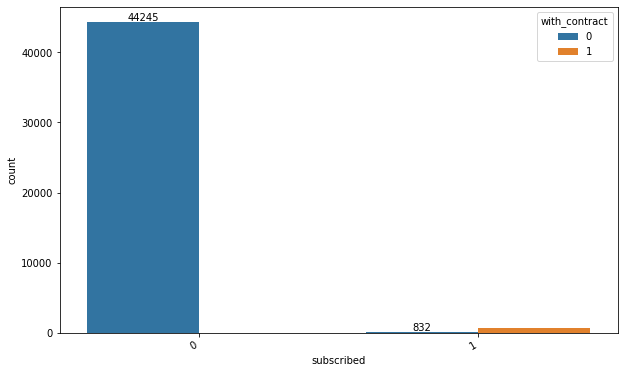

In [75]:
countplot_targetvsfeature(leads_data,'subscribed',leads_data['with_contract'])

In [76]:
leads_data['with_contract'].value_counts()

0    44340
1      737
Name: with_contract, dtype: int64

There are 832 leads that subscribed, from which only 737 appear with a contract date ('signed_contract') and the other 76 do not have any date filled.

*By may there were 509 subscribed and 433 with contract date*

### 6. Analize lead_generation_app_id

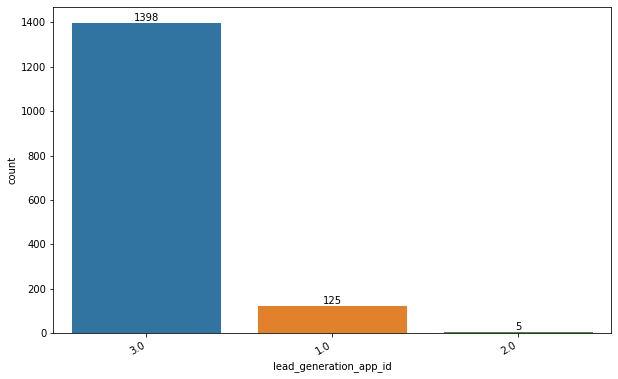

In [77]:
countplot_features(leads_data,'lead_generation_app_id')

In [78]:
leads_data.groupby(['lead_generation_app_id', 'utm_medium','utm_source']).size()

lead_generation_app_id  utm_medium  utm_source 
1.0                     referral    aprendemas      125
2.0                     referral    educaedu          2
                                    educaweb          3
3.0                     referral    careerkarma    1398
dtype: int64

In [79]:
#How many of those previous leads did convert into a client?

won_df['lead_generation_app_id'].value_counts()

3.0    14
1.0     1
Name: lead_generation_app_id, dtype: int64

CareerKarma is bringing more leads compared to the other 2 lead_generation apps, and has already converted 14 leads. (2 until May)

### 7. Make sure landingjobs in utm_source is assigned to utm_medium = referral

In [80]:
leads_data[leads_data['utm_source']=='landingjobs']

,id,first_name,email,course,language,utm_url,utm_medium,utm_campaign,country,created_at,...,deal_status,ac_contact_id,ac_deal_id,user_id,won_at,lead_generation_app_id,subscribed,has_gclid,days_to_convert,with_contract
1518,11946,Ainhoa Palacio Gonzalez,ainhoapalacio@gmail.com,full-stack,en,https://4geeksacademy.com/us/landing/scholarsh...,referral,NaN,France,2021-09-14,...,NaN,30457.0,25916.0,NaN,NaT,NaN,0,0,NaN,0
1519,13463,Solomon Soh,sohzhehong@gmail.com,machine-learning-engineering,en,https://4geeksacademy.com/us/landing/scholarsh...,referral,NaN,France,2021-10-02,...,NaN,31699.0,27206.0,NaN,NaT,NaN,0,0,NaN,0
1539,13490,Nazareno Costa,nazarenoc@gmail.com,machine-learning-engineering,en,https://4geeksacademy.com/us/landing/scholarsh...,referral,NaN,France,2021-10-02,...,LOST,31721.0,27227.0,NaN,NaT,NaN,0,0,NaN,0
1561,12000,Alina Carvalho,alina.carvalho84@gmail.com,full-stack,en,https://4geeksacademy.com/us/landing/scholarsh...,referral,NaN,France,2021-09-14,...,LOST,30499.0,25958.0,NaN,NaT,NaN,0,0,NaN,0
1624,11897,Francesco,francesco.baldissera@gmail.com,machine-learning-engineering,en,https://4geeksacademy.com/es/landing/becas-lan...,referral,NaN,France,2021-09-14,...,LOST,30410.0,25869.0,NaN,NaT,NaN,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41941,13558,Themistoklis Sevastos,sevthem@yahoo.gr,full-stack,en,https://4geeksacademy.com/us/landing/scholarsh...,referral,NaN,France,2021-10-02,...,LOST,31774.0,27279.0,NaN,NaT,NaN,0,0,NaN,0
41961,12191,Fabiano Pessôa,fabiano.pessoa@pensiero.digital,machine-learning-engineering,en,https://4geeksacademy.com/us/landing/scholarsh...,referral,NaN,France,2021-09-15,...,LOST,30665.0,26126.0,NaN,NaT,NaN,0,0,NaN,0
42813,12123,Erica Escudero,solenergia2017@gmail.com,machine-learning-engineering,en,https://4geeksacademy.com/es/landing/becas-lan...,referral,NaN,France,2021-09-15,...,NaN,30603.0,26065.0,NaN,NaT,NaN,0,0,NaN,0
42832,12060,Apostolos Giatsidis,ap.giatsidis@gmail.com,machine-learning-engineering,en,https://4geeksacademy.com/us/landing/scholarsh...,referral,NaN,France,2021-09-14,...,NaN,30550.0,26010.0,NaN,NaT,NaN,0,0,NaN,0


In [81]:
leads_data.groupby(['utm_medium', 'utm_source']).size()

utm_medium            utm_source       
FB paid               facebook               36
Facebook_Marketplace  23850859616000143       1
Inmail                linkedin                1
cpc                   an                      1
                      bing                   57
                      cpc                     3
                      facebook             4564
                      google               7357
                      instagram            4222
                      linkedin                3
                      zoho_recruite          81
email                 ActiveCampaign         52
                      hs_email                3
event                 techhub                 1
inscripcion           qsd.com                 8
organic               youtube                 2
referral              aprendemas            125
                      bootcamprankings        4
                      careerkarma          1425
                      coursereport          262


All utm_source = landingjobs are appearing with referral in utm_medium.

### 8. Conversion time from leads that did not drop

In [82]:
contracts = leads_data[leads_data['with_contract']=='1']
contracts_df = pd.DataFrame(contracts)

In [83]:
#Time in days since first contact until signing a contract.

stat_contracts = contracts_df['days_to_convert'].describe()
print(stat_contracts)

count    737.000000
mean      76.202171
std      104.260966
min        0.000000
25%       10.000000
50%       43.000000
75%       84.000000
max      590.000000
Name: days_to_convert, dtype: float64


Text(0, 0.5, 'Days')

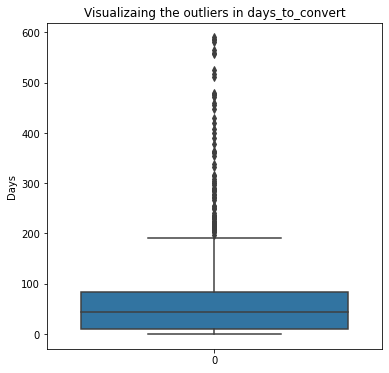

In [84]:
plt.figure(figsize=(6,6))
sns.boxplot(data=leads_data['days_to_convert'])
plt.title('Visualizaing the outliers in days_to_convert')
plt.ylabel('Days')

In [85]:
#Now let's see where do all those leads that didn't drop came from.

contracts_df['utm_source'].value_counts()

google          130
instagram        33
facebook         30
careerkarma      14
landingjobs       8
coursereport      7
aprendemas        1
linkedin          1
ticjob            1
Name: utm_source, dtype: int64

In [86]:
#Now we will do the same analysis as before but considering all the won status (even if they do not have a contract date)

won_df['utm_source'].value_counts()

google          147
facebook         38
instagram        37
careerkarma      14
landingjobs       9
coursereport      7
bing              1
aprendemas        1
linkedin          1
ticjob            1
Name: utm_source, dtype: int64

### 9. How many wons are that did not come from cpc?

In [87]:
won_df['utm_medium'].value_counts()

cpc         223
referral     34
social        1
Name: utm_medium, dtype: int64

From the leads marked as won, 10% are not from cpc.

### 10. Check if WONS have newsletter besides request_more_info in TAGS.

In [88]:
won_df['tags'].value_counts()

website-lead                         467
request_more_info                    334
utec-uruguay                          16
contact-us                            10
newsletter                             3
website-lead,blacks-in-technology      2
Name: tags, dtype: int64

The people who subscribed have mainly the 'website-lead' and 'request_more_info' tag. But they do not have newsletter besides 'request_more_info'.

### 11. Make sure Spain is filling won_at (contract_date)

In [89]:
won_df.loc[(won_df['academy_id'] == 6.0) & won_df['won_at'].isnull()]

,id,first_name,email,course,language,utm_url,utm_medium,utm_campaign,country,created_at,...,academy_id,deal_status,ac_contact_id,ac_deal_id,user_id,won_at,lead_generation_app_id,subscribed,has_gclid,days_to_convert
5190,5832,Javier L. Seiglie,jseiglie@gmail.com,full-stack,es,facebook_form_182669996627327,cpc,[SIDN] Clientes potenciales,NaN,2021-04-03,...,6.0,WON,25010.0,21081.0,NaN,NaT,NaN,1,1,NaN
5280,7153,Florence Paloma Gaspar,f.palomagaspar@gmail.com,full-stack,es,facebook_form_182669996627327,cpc,[SIDN] Clientes potenciales,NaN,2021-05-14,...,6.0,WON,25986.0,22022.0,3503.0,NaT,NaN,1,1,NaN
6038,6754,Nita Gabriel,gabyiy2000@yahoo.com,full-stack,es,facebook_form_182669996627327,cpc,[SIDN] Clientes potenciales,NaN,2021-04-30,...,6.0,WON,25676.0,21708.0,NaN,NaT,NaN,1,1,NaN
6652,6939,pepe,bryan_2904@hotmail.com,full-stack,en,https://4geeksacademy.com/es/coding-bootcamps/...,cpc,10503661130,Spain,2021-05-05,...,6.0,WON,25626.0,21665.0,3467.0,NaT,NaN,1,1,NaN
7111,7881,Isaac Ruiz Gavilán,isaacrg1996@gmail.com,full-stack,en,https://4geeksacademy.com/us/coding-bootcamps/...,NaN,NaN,Spain,2021-06-10,...,6.0,WON,26974.0,22638.0,3610.0,NaT,NaN,1,0,NaN
7233,9599,Adrian Gualsaqui,adriangualsaqui@hotmail.com,full-stack,es,facebook_form_182669996627327,cpc,4Geeks - Prospecting - Clientes Potenciales,NaN,2021-08-04,...,6.0,WON,28509.0,23968.0,3725.0,NaT,NaN,1,1,NaN
11118,23988,Enrique,egl12@hotmail.es,machine-learning-engineering,en,https://4geeksacademy.com/us/apply,NaN,NaN,Spain,2022-02-12,...,6.0,WON,40679.0,40158.0,4480.0,NaT,NaN,1,0,NaN
11763,9118,Gloria Silva,imgloriasilva@gmail.com,full-stack,en,https://4geeksacademy.com/es/aplica,NaN,NaN,Spain,2021-07-22,...,6.0,WON,28025.0,23617.0,3853.0,NaT,NaN,1,0,NaN
11772,8843,Rubén López Magán,rublopmag@hotmail.com,full-stack,en,https://4geeksacademy.com/es/coding-bootcamps/...,NaN,NaN,Spain,2021-07-14,...,6.0,WON,26982.0,22648.0,3734.0,NaT,NaN,1,0,NaN
14776,24696,Sergio Centenera Mayoral,scentmay@gmail.com,full-stack,es,facebook_form_182669996627327,cpc,4Geeks - Prospecting - Clientes Potenciales,NaN,2022-02-17,...,6.0,WON,41227.0,41574.0,4744.0,NaT,NaN,1,1,NaN


There are 109 leads labeled as WON in Spain academy, and from them there are 91 with a signed contract. 
18 leads without a contract date. 3 of them have been updated on March 21st).

### 12. Verify if leads coming from facebook and google that have cpc assigned but no gclid are from past years.

In [90]:
#facebook

data[(data.utm_source == 'facebook') & (data.has_gclid == '0') & (data.utm_medium == 'cpc')]['created_at'].value_counts()

2022-07-11    8
2022-07-08    4
2021-02-09    3
2022-07-10    3
2021-02-07    3
             ..
2022-01-26    1
2022-01-31    1
2022-01-18    1
2021-12-29    1
2022-08-10    1
Name: created_at, Length: 85, dtype: int64

In [91]:
#google

data[(data.utm_source == 'google') & (data.has_gclid == '0') & (data.utm_medium == 'cpc')]['created_at'].value_counts()

2022-04-01    5
2022-06-06    4
2022-07-30    4
2022-08-13    3
2021-08-15    3
             ..
2022-07-27    1
2021-09-22    1
2022-04-12    1
2022-05-12    1
2022-05-11    1
Name: created_at, Length: 125, dtype: int64

### 13. Analize repeated leads.

In [92]:
duplicated_rows_df = leads_data[leads_data.duplicated(['email'])]

In [93]:
duplicated_rows_df

,id,first_name,email,course,language,utm_url,utm_medium,utm_campaign,country,created_at,...,deal_status,ac_contact_id,ac_deal_id,user_id,won_at,lead_generation_app_id,subscribed,has_gclid,days_to_convert,with_contract
17,178,Janice,rosnice17@gmail.com,software-engineering,es,https://4geeksacademy.co/us/course/software-en...,NaN,NaN,Remote,2020-09-25,...,NaN,NaN,NaN,NaN,NaT,NaN,0,0,NaN,0
29,150,Adrian,adrian_amesty@hotmail.com,full-stack,es,https://4geeksacademy.co/es/aplica,NaN,NaN,Venezuela,2020-09-24,...,NaN,NaN,NaN,NaN,NaT,NaN,0,0,NaN,0
30,169,José,josemfcheo@gmail.com,software-engineering,es,https://4geeksacademy.co/us/course/software-en...,NaN,NaN,Venezuela,2020-09-25,...,NaN,NaN,NaN,NaN,NaT,NaN,0,0,NaN,0
32,99,Patricia,2231valemati@gmail.com,full-stack,es,https://4geeksacademy.co/es/course/desarrollo-...,NaN,NaN,Venezuela,2020-09-22,...,NaN,NaN,NaN,NaN,NaT,NaN,0,0,NaN,0
33,115,Patricia,2231valemati@gmail.com,NaN,es,https://4geeksacademy.co/us/location/online-re...,NaN,NaN,Venezuela,2020-09-22,...,NaN,NaN,NaN,NaN,NaT,NaN,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45064,45795,ANDRES EDUARDO SEPULVEDA NASCIMENTO,SEPU_94@HOTMAIL.COM,full-stack,en,https://4geeksacademy.com/es/aplica,cpc,13032913419,Spain,2022-08-13,...,NaN,51799.0,NaN,NaN,NaT,NaN,0,0,NaN,0
45066,45805,Javier Mauricio Restrepo,maoresquigua@gmail.com,full-stack,en,https://4geeksacademy.com/es/aplica,cpc,chili-trafico-colombia,Colombia,2022-08-13,...,NaN,58736.0,62497.0,NaN,NaT,NaN,0,1,NaN,0
45070,45802,NaN,maoresquigua@gmail.com,NaN,en,https://4geeksacademy.com/es/premios,cpc,chili-trafico-colombia,Colombia,2022-08-13,...,NaN,58736.0,NaN,NaN,NaT,NaN,0,1,NaN,0
45072,45664,Maydana Hernan Exequiel,maydanarkt@gmail.com,full-stack,en,https://4geeksacademy.com/es/aplica,NaN,NaN,Argentina,2022-08-11,...,NaN,58595.0,62344.0,NaN,NaT,NaN,0,0,NaN,0


In [94]:
duplicated_rows_df.shape

(11232, 28)

In [95]:
repeated_leads = duplicated_rows_df.groupby(['email','created_at']).size()
repeated_df = pd.DataFrame(repeated_leads)

In [96]:
repeated_df

0
email                       created_at   
010.sergio@gmail.com        2020-11-09  1
02sergioconde@gmail.com     2021-11-02  1
                            2022-03-28  1
                            2022-03-30  1
07.ebad@gmail.com           2022-06-29  1
...                                    ..
zuberlye@gmail.com          2022-03-03  1
zuckaschilling@gmail.com    2022-05-07  1
zuluaganeider@gmail.com     2022-04-27  1
zumanzuesaubrey29@gmail.com 2022-05-17  1
zunigasm.ariel@gmail.com    2021-08-03  2

[8972 rows x 1 columns]